In [1]:
%%capture
!wget "https://www.dropbox.com/scl/fi/f1ietptzhf0xiay1xrioi/airplanes.tar?rlkey=7oou86sfnacntbvdxbgesctkw&st=lsgf0dvi&dl=0" -O airplanes.tar
!tar --warning=no-unknown-keyword -xzf airplanes.tar

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
bs = 64  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size
PATH = './data/airplanes/'

In [5]:
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d)
print ("There are ", len(classes), "classes:\n", classes)

There are  61 classes:
 ['DC-9', 'SR-20', 'CRJ', 'MD-11', 'Falcon', 'EMB-120', 'Challenger', 'Tornado', 'Gulfstream', 'Spitfire', 'Tu-154', 'Beechcraft 1900', 'DHC-1', 'A330', 'A310', 'L-1011', '767', 'A318', 'A380', 'Boeing 717', 'Global Express', 'Hawk T1', 'Cessna', 'A319', 'BAE-125', 'A320', 'ATR', 'A340', 'DC-3', 'F-16', '737', 'BAE 146', 'A321', 'Embraer Legacy', 'Yak-42', 'Model B200', '747', 'ERJ', 'Dornier 328', 'DHC-6', 'PA-28', 'Saab', 'Eurofighter Typhoon', 'Tu-134', '727', 'MD-', 'DR-400', 'C-130', 'DH-82', 'F', '777', 'C-47', 'A300', '707', 'An', '757', 'DC-6', 'DC-8', 'Metroliner', 'DHC-8', 'Fokker']


In [6]:
#!pip install fastai

from fastai.vision.all import *


for c in classes:
    print ("Class:", c)
    fns = verify_images(get_image_files(os.path.join(PATH, c)))
    print(fns)
    for fn in fns:
        os.remove(fn)

Class: DC-9
[]
Class: SR-20
[]
Class: CRJ
[]
Class: MD-11
[]
Class: Falcon
[]
Class: EMB-120
[]
Class: Challenger
[]
Class: Tornado
[]
Class: Gulfstream
[]
Class: Spitfire
[]
Class: Tu-154
[]
Class: Beechcraft 1900
[]
Class: DHC-1
[]
Class: A330
[]
Class: A310
[]
Class: L-1011
[]
Class: 767
[]
Class: A318
[]
Class: A380
[]
Class: Boeing 717
[]
Class: Global Express
[]
Class: Hawk T1
[]
Class: Cessna
[]
Class: A319
[]
Class: BAE-125
[]
Class: A320
[]
Class: ATR
[]
Class: A340
[]
Class: DC-3
[]
Class: F-16
[]
Class: 737
[]
Class: BAE 146
[]
Class: A321
[]
Class: Embraer Legacy
[]
Class: Yak-42
[]
Class: Model B200
[]
Class: 747
[]
Class: ERJ
[]
Class: Dornier 328
[]
Class: DHC-6
[]
Class: PA-28
[]
Class: Saab
[]
Class: Eurofighter Typhoon
[]
Class: Tu-134
[]
Class: 727
[]
Class: MD-
[]
Class: DR-400
[]
Class: C-130
[]
Class: DH-82
[]
Class: F
[]
Class: 777
[]
Class: C-47
[]
Class: A300
[]
Class: 707
[]
Class: An
[]
Class: 757
[]
Class: DC-6
[]
Class: DC-8
[]
Class: Metroliner
[]
Class: D

In [7]:
from fastai.vision.all import *

# Use DataBlock to create your DataLoaders object
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   item_tfms=Resize((200, 200)), # Use aug_transforms() for more options
                   batch_tfms=Normalize.from_stats(*imagenet_stats))

data = dblock.dataloaders(PATH, size=sz, bs=bs, valid_pct=0.2)

In [8]:
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

There are 7600 training images and 1900 validation images.


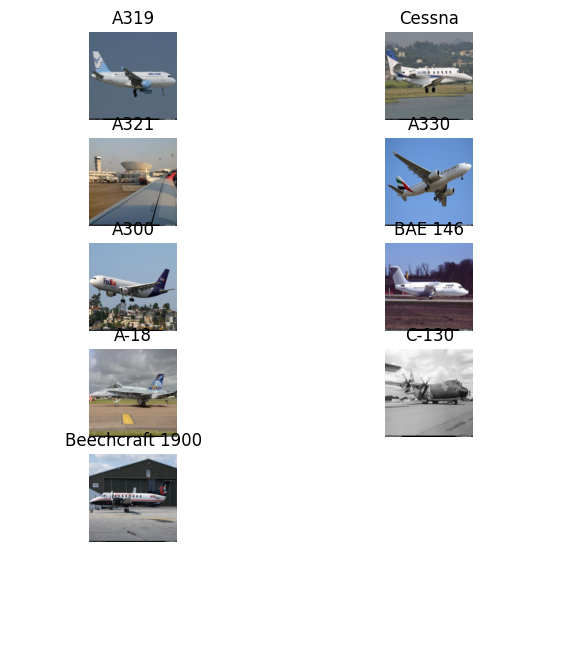

In [9]:
data.show_batch(nrows=6, figsize=(7,8))

In [10]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 186MB/s]


/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(valley=0.00363078061491251)

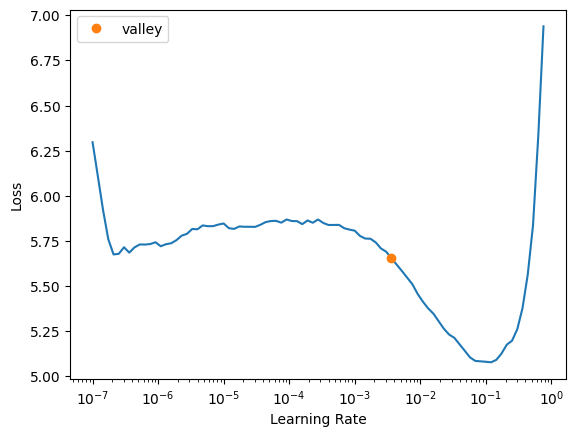

In [11]:

learn.lr_find()

In [12]:
learn.fit_one_cycle(10, lr_max=slice(1e-3,1e-1))
"""
ResNet18(1e-3 to 1e-2): 72% accuracy
ResNet34(1e-3 to 1e-2): 77% accuracy
ResNet34(1e-3 to 1e-1): 74.2% accuracy                                     - EXTRA NOTES: 42.2% > 34.3% > 33.9% > 39.8% > 51.6% > 57.8% > 67.2% > 71.1% > 73.8% > 74.2% - accuarcy decreasesand then increases
ResNet50(1e-3 to 1e-2): 73.8% accuracy
ResNet50(1e-3 to 1e-1): 81.8% accuracy
vgg11(1e-3 to 1e-1): 63.7% accuracy                                        - EXTRA NOTES: 40.2% > 30.5% > 29.5% > 36.7% > 39.8% > 46.1% > 54.6% > 59.1% > 62.4% > 63.7% - accuracy decreases and then increases
vgg16(1e-3 to 1e-1): 61.3% accuracy                                        - EXTRA NOTES: 38.3% > 34.5% > 29.6% > 38.6% > 39.3% > 47.2% > 50.3% > 58.0% > 61.5% > 61.3% - accuracy decreases and then increases
"""

epoch,train_loss,valid_loss,accuracy,time
0,3.339122,2.313259,0.391579,00:57
1,3.279083,3.751992,0.420000,01:01
2,5.963656,5.008482,0.458947,00:58
3,5.131884,85.170372,0.569474,00:58
4,3.561117,33.288597,0.615263,00:59
5,2.401709,55.001945,0.693158,01:00
6,1.508564,21.549971,0.709474,01:00
7,0.828639,15.110241,0.767895,01:01
8,0.459072,3.046633,0.773684,01:01
9,0.357675,9.277804,0.780526,01:00


'\nResNet18(1e-3 to 1e-2): 72% accuracy\nResNet34(1e-3 to 1e-2): 77% accuracy\nResNet34(1e-3 to 1e-1): 74.2% accuracy                                     - EXTRA NOTES: 42.2% > 34.3% > 33.9% > 39.8% > 51.6% > 57.8% > 67.2% > 71.1% > 73.8% > 74.2% - accuarcy decreasesand then increases\nResNet50(1e-3 to 1e-2): 73.8% accuracy\nResNet50(1e-3 to 1e-1): 81.8% accuracy\nvgg11(1e-3 to 1e-1): 63.7% accuracy                                        - EXTRA NOTES: 40.2% > 30.5% > 29.5% > 36.7% > 39.8% > 46.1% > 54.6% > 59.1% > 62.4% > 63.7% - accuracy decreases and then increases\nvgg16(1e-3 to 1e-1): 61.3% accuracy                                        - EXTRA NOTES: 38.3% > 34.5% > 29.6% > 38.6% > 39.3% > 47.2% > 50.3% > 58.0% > 61.5% > 61.3% - accuracy decreases and then increases\n'

In [13]:
interp = ClassificationInterpretation.from_learner(learn)

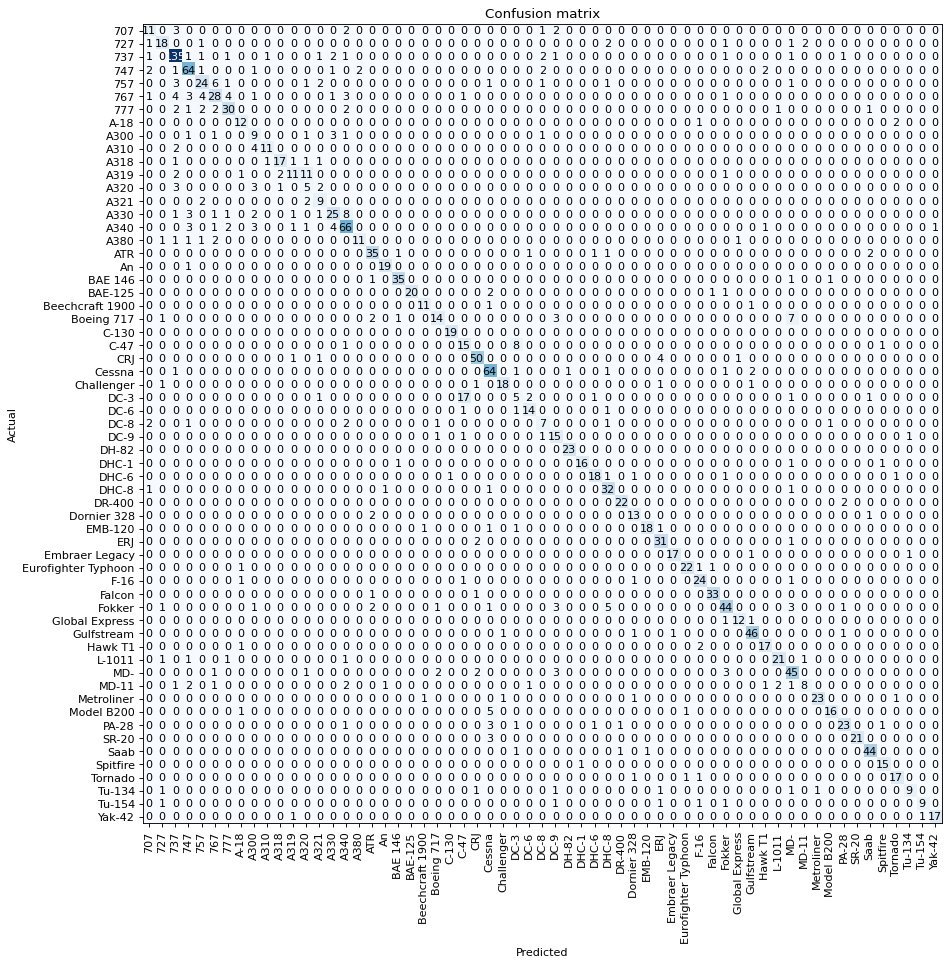

In [14]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi=80)

                     precision    recall  f1-score   support

                707       0.58      0.58      0.58        19
                727       0.72      0.69      0.71        26
                737       0.84      0.90      0.87       150
                747       0.78      0.84      0.81        76
                757       0.67      0.59      0.62        41
                767       0.65      0.55      0.60        51
                777       0.75      0.73      0.74        41
               A-18       0.71      0.80      0.75        15
               A300       0.38      0.53      0.44        17
               A310       0.85      0.65      0.73        17
               A318       0.85      0.77      0.81        22
               A319       0.69      0.39      0.50        28
               A320       0.22      0.36      0.27        14
               A321       0.50      0.69      0.58        13
               A330       0.69      0.58      0.63        43
               A340    

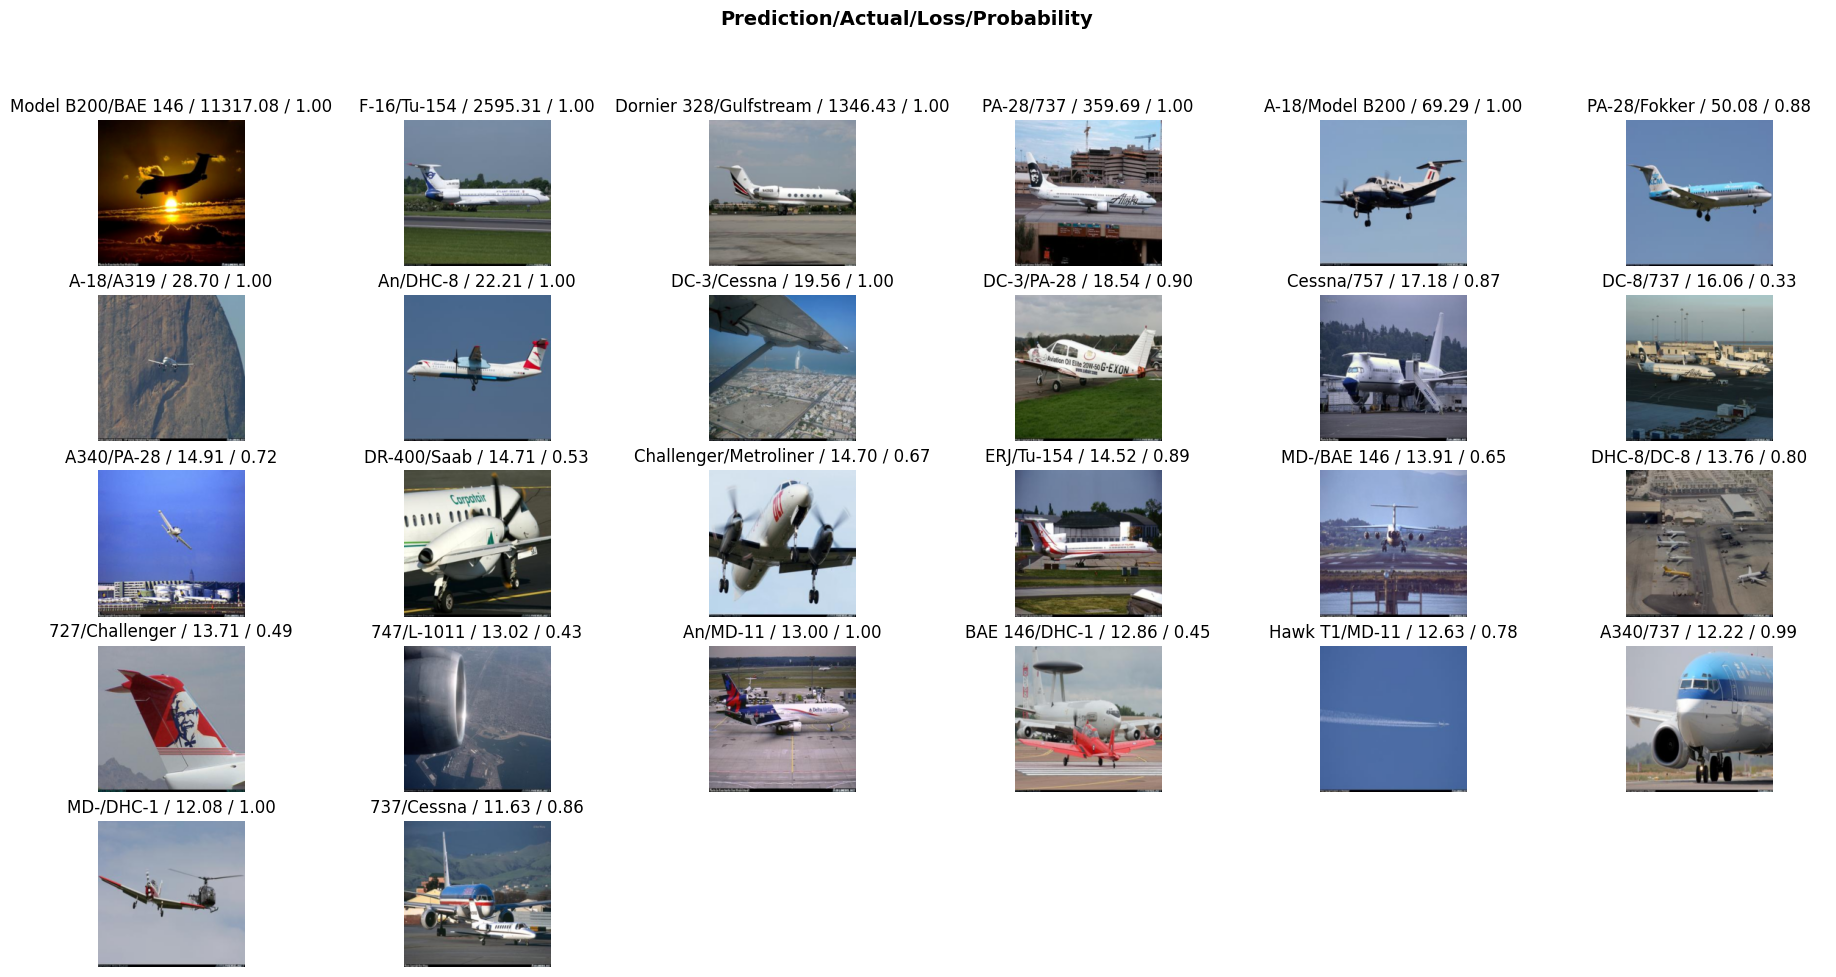

In [20]:
interp.plot_top_losses(26, figsize=(23,11))
interp.print_classification_report()

In [18]:
interp.plot

AttributeError: 'ClassificationInterpretation' object has no attribute 'plot'